## Loading Libraries


In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [77]:
data = pd.read_csv("fraud_data.csv")

In [78]:
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
data.shape

(59054, 434)

## Data pre-processing and wrangling

### Train Test Data Split - to evaluate performance in an unbiased manner

In [80]:
# set x and y variables
X = data.loc[:, data.columns != "isFraud"]
y = data["isFraud"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=123)



## Step 1. Check for missingness in variables 

In [81]:
X_train.isnull().sum() 

TransactionID         0
TransactionDT         0
TransactionAmt        0
ProductCD             0
card1                 0
                  ...  
id_36             31403
id_37             31403
id_38             31403
DeviceType        31419
DeviceInfo        33011
Length: 433, dtype: int64

## Eliminate automatically variables with more than 20% of missingness

In [82]:
# Eliminate automatically variables with more than 20% of missingness

x_train_before_filling= X_train
X_train = X_train[X_train.columns[X_train.isnull().mean() < 0.2]]
X_train.shape



(41337, 181)

## Let us see which among remaining columns have missing values in the code below

In [83]:
missing_cols=X_train.columns[X_train.isnull().mean() > 0]
print(missing_cols)

Index(['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
       'P_emaildomain', 'D1', 'D10',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=162)


## Impute Numeric Variables with mean of the variable

In [84]:
X_train_single= X_train
cols= X_train_single.columns
num_cols = X_train_single.select_dtypes(include=np.number).columns
X_train_single.loc[:,num_cols]=X_train_single.loc[:,num_cols].fillna(X_train_single.loc[:,num_cols].mean())
print(num_cols)
print(X_train_single.loc[:,num_cols].mean())

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2',
       'card3', 'card5', 'addr1', 'addr2', 'C1',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=177)
TransactionID     3.281805e+06
TransactionDT     7.357705e+06
TransactionAmt    1.347207e+02
card1             9.912457e+03
card2             3.626188e+02
                      ...     
V317              2.722976e+02
V318              1.823263e+02
V319              1.665254e+01
V320              4.211091e+01
V321              2.752951e+01
Length: 177, dtype: float64


## Impute Categorical Variables with mode of the variable

In [85]:
cat_cols= list(set(cols) - set(num_cols))
X_train_single.loc[:,cat_cols] = X_train_single.loc[:,cat_cols].fillna(X_train.loc[:,cat_cols].mode().iloc[0])
train_cols = X_train_single.columns
print(cat_cols)
print(X_train_single.loc[:,cat_cols].mode().iloc[0])

['ProductCD', 'card6', 'P_emaildomain', 'card4']
ProductCD                W
card6                debit
P_emaildomain    gmail.com
card4                 visa
Name: 0, dtype: object


### Check if missingness is now 0 for all variables remaining 
##### empty column list indicates no variable has missing values anymore!

In [86]:
X_train_single.columns[X_train_single.isnull().mean() > 0] 

Index([], dtype='object')

## Step 2. One hot encoding : To make all variables numeric to feed to machine learning process further

In [87]:
X_train.info()
X_Train_dummy = pd.get_dummies(X_train, prefix_sep='_', drop_first=True)

<class 'pandas.core.frame.DataFrame'>
Index: 41337 entries, 12662 to 52734
Columns: 181 entries, TransactionID to V321
dtypes: float64(160), int64(17), object(4)
memory usage: 57.4+ MB


In [88]:
X_Train_dummy

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
12662,3058646,1612658,46.500,7861,494.0,150.0,226.0,299.000000,87.000000,1,...,False,False,False,False,False,False,False,False,False,False
47037,3469434,12533197,20.950,10748,455.0,150.0,195.0,337.000000,87.000000,9,...,False,False,False,False,False,False,False,False,False,False
29179,3302515,7855766,139.117,4606,141.0,185.0,137.0,290.763705,86.802851,1,...,False,False,False,False,False,False,False,False,False,False
40680,3010196,595984,280.330,4141,404.0,150.0,102.0,327.000000,87.000000,1,...,False,False,False,False,False,False,False,False,False,False
6080,3288879,7447462,186.610,13266,321.0,150.0,226.0,158.000000,87.000000,13,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54370,3500688,13452492,311.950,10057,225.0,150.0,224.0,123.000000,87.000000,3,...,False,False,False,False,False,False,False,False,False,False
17730,3038837,1212291,114.950,2492,543.0,150.0,224.0,299.000000,87.000000,3,...,False,False,False,False,False,False,False,False,False,False
28030,3055357,1544901,75.000,1690,516.0,150.0,224.0,110.000000,87.000000,1,...,False,False,False,False,False,False,False,False,False,False
15725,3144269,3273875,206.000,17188,321.0,150.0,226.0,310.000000,87.000000,6,...,False,False,False,False,False,False,False,False,False,False


## Finalizing the data before training a model

In [89]:
final_tr = pd.DataFrame(data = X_Train_dummy)

print(final_tr.head())
print(final_tr.shape)

       TransactionID  TransactionDT  TransactionAmt  card1  card2  card3   
12662        3058646        1612658          46.500   7861  494.0  150.0  \
47037        3469434       12533197          20.950  10748  455.0  150.0   
29179        3302515        7855766         139.117   4606  141.0  185.0   
40680        3010196         595984         280.330   4141  404.0  150.0   
6080         3288879        7447462         186.610  13266  321.0  150.0   

       card5       addr1      addr2  C1  ...  P_emaildomain_web.de   
12662  226.0  299.000000  87.000000   1  ...                 False  \
47037  195.0  337.000000  87.000000   9  ...                 False   
29179  137.0  290.763705  86.802851   1  ...                 False   
40680  102.0  327.000000  87.000000   1  ...                 False   
6080   226.0  158.000000  87.000000  13  ...                 False   

       P_emaildomain_windstream.net  P_emaildomain_yahoo.co.jp   
12662                         False                     

In [90]:
## Decision Tree using grid search CV
from sklearn import tree
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4,cv=5,scoring = 'roc_auc')
clf.fit(X=final_tr, y = y_train)
dt = clf.best_estimator_  #final decision tree!
print (clf.best_score_, clf.best_params_) 

0.7644398152840788 {'max_depth': 8}


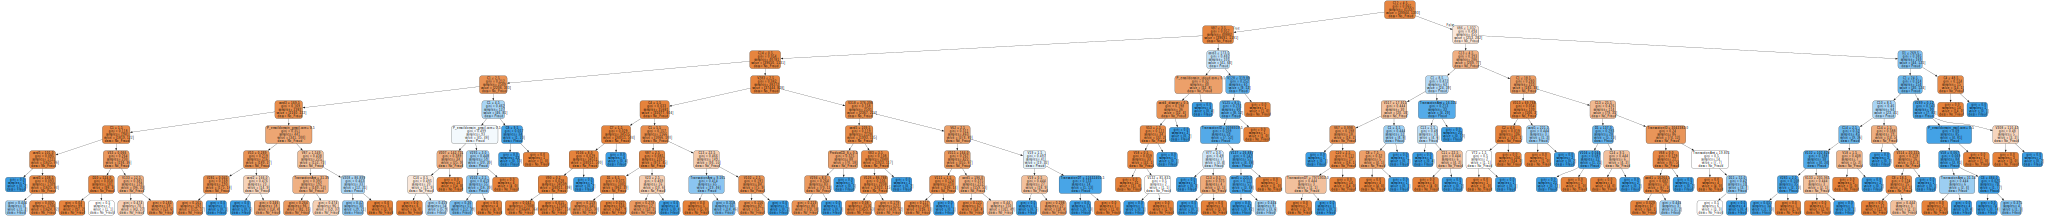

In [91]:
## Visualizing the decision tree initially- load visualization libraries
from sklearn.tree import export_graphviz
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None, 
                    feature_names=final_tr.columns,  
                      class_names=['No_Fraud','Fraud'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph